# Creating and examining the Spotify dataframe

Imports the necessary libraries and loads the csv file


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

spotify_df = pd.read_csv('data.csv')
spotify_df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

Gives a preview of the data.csv file including:
- Gets rid of null values
- Gets rid of any duplicates
- First 5 rows

In [95]:
spotify_df.dropna()
spotify_df.drop_duplicates()
print(spotify_df.head())

   acousticness                    artists  danceability  duration_ms  energy  \
0      0.991000            ['Mamie Smith']         0.598       168333   0.224   
1      0.643000  ["Screamin' Jay Hawkins"]         0.852       150200   0.517   
2      0.993000            ['Mamie Smith']         0.647       163827   0.186   
3      0.000173        ['Oscar Velazquez']         0.730       422087   0.798   
4      0.295000                   ['Mixe']         0.704       165224   0.707   

   explicit                      id  instrumentalness  key  liveness  \
0         0  0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   
1         0  0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809   
2         0  11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   
3         0  19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280   
4         1  2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020   

   loudness  mode                                               name  \
0   -12.

Gets the total number of rows in the dataframe

In [96]:
len(spotify_df)

174389

# Analyzes the music that contains explicit content from 1920-2021

This adds a column named 'Decade' to the dataframe

In [97]:
spotify_df['decade'] = (spotify_df['year'].apply(lambda x: str(int(x)//10*10) + 's'[-2:]))

Gets the required data and uses it to make a stacked bar graph

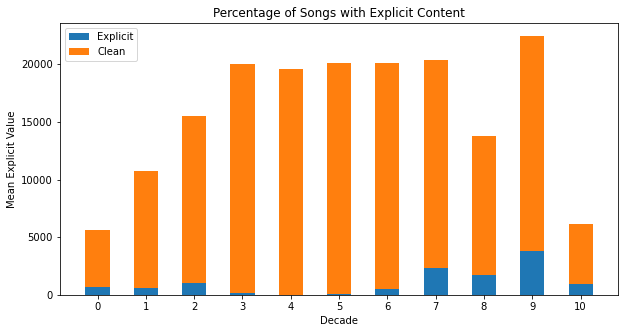

<Figure size 432x288 with 0 Axes>

In [98]:
spotify_bar_explicit = spotify_df[spotify_df['explicit'] == 1].groupby('decade').id.count().reset_index(name = 'Count_ex')
spotify_bar_clean = spotify_df[spotify_df['explicit'] == 0].groupby('decade').id.count().reset_index(name = 'Count_cl')
explicit_bar = spotify_bar_explicit.Count_ex
clean_bar = spotify_bar_clean.Count_cl
decades = spotify_bar_explicit.decade.nunique()
ind = np.arange(decades)
width = 0.5
plt.figure(figsize = (10, 5))
plt.bar(ind, explicit_bar, width, label = 'Explicit bar')
plt.bar(ind, clean_bar, width, label = 'Clean bar', bottom = explicit_bar)
plt.xlabel('Decade')
plt.ylabel('Mean Explicit Value')
plt.xticks(ind)
plt.title('Percentage of Songs with Explicit Content')
plt.legend(['Explicit', 'Clean'])
plt.show()
plt.clf()

# Loudness of music over the last century

Creates a line graph of the loudness of music for each year

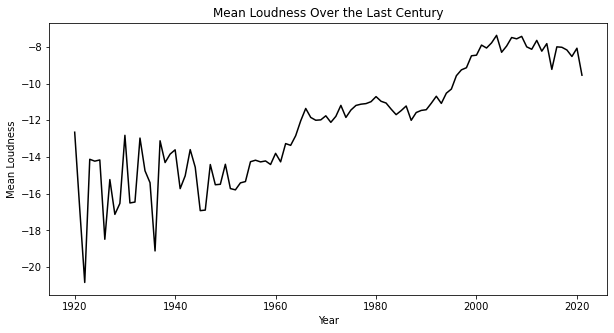

In [99]:
mean_df = spotify_df.groupby(['year']).mean()
plt.figure(figsize = (10,5))
plt.plot(mean_df['loudness'], color = 'black')
plt.xlabel('Year')
plt.ylabel('Mean Loudness')
plt.title('Mean Loudness Over the Last Century')
plt.show()

You can see from this graph that over time music has become louder with a major spike around the 1980's

# How popular is your favorite artist?

Defines a function artist_pop that takes an artists name as input and returns the average popularity of their songs

In [100]:
def artist_pop(artist):
    popularities = spotify_df.loc[spotify_df['artists'].str.contains(artist), 'popularity'].tolist()
    avg_pop = round(sum(popularities)/ len(popularities), 2)
    return '{artist} has an average popularity of: {avg_pop}'.format(artist = artist, avg_pop = avg_pop)

Tests the artists_pop function with various artists

In [101]:
print(artist_pop('Travis Scott'))
print(artist_pop('Alesso'))
print(artist_pop('Bruno Mars'))

Travis Scott has an average popularity of: 69.89
Alesso has an average popularity of: 49.67
Bruno Mars has an average popularity of: 66.52
